In [3]:
import ast
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#getdata
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleandata
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\python\libs\miniconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#get only data engineering jobs in US
df_US=df[(df['job_country']=='United States')].copy()

#drop nan values from 'salary_year_avg' col.
df_US = df_US.dropna(subset=['salary_year_avg'])

In [5]:
#Get top 6 jobs from the US
job_titles=df_US['job_title_short'].value_counts().index[:6].tolist()

#filter the dataframe isin checks that the list we made before matches the jobtitleshort to this new dataframe that we r plotting
df_us_top6=df_US[df['job_title_short'].isin(job_titles)]

C:\Users\bituk\AppData\Local\Temp\ipykernel_7156\4000580569.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_us_top6=df_US[df['job_title_short'].isin(job_titles)]


In [6]:
#order the job list in order for the vizualiation to be in an order from lowest salary to largest salary
joborder_list=df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

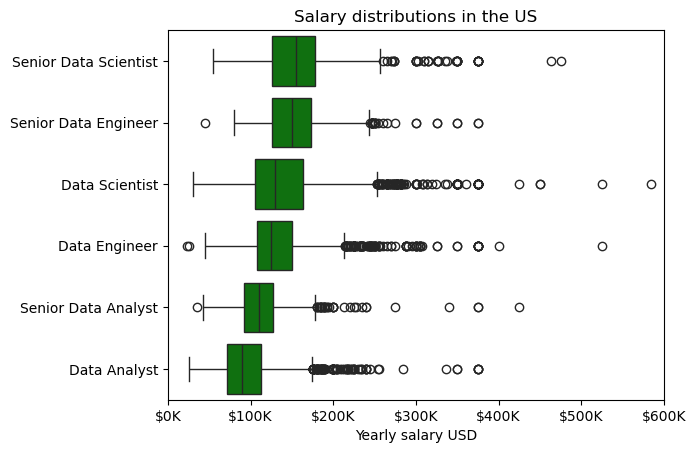

In [7]:
#plot the boxplot
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short', order=joborder_list, color='green')

#formatting
plt.title('Salary distributions in the US')
plt.xlabel('Yearly salary USD')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()
